# Classify the data shown in the MNIST data


* Do this using the best practices discussed in class (i.e. one hot encoding, ReLU, CNNS when you should, etc.)

* Have reasonable hyperparameters


In [2]:
# Importing the libraries
import numpy as np
import keras
from matplotlib import pyplot as plt
import itertools
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout
from mnist import MNIST #python-mnist package (available only through pip)
import os





/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Loading the Training and Testing Data
trainImages = np.load('trainImages.npy')
testImages = np.load('testImages.npy')
trainLabels = np.load('trainLabels.npy')
testLabels = np.load('testLabels.npy')

# Converting to Float32 to do input data Normalization
trainImages = trainImages.astype('float32') #images loaded in as int64, 0 to 255 integers
testImages = testImages.astype('float32')
# Normalization
trainImages /= 255
testImages /= 255


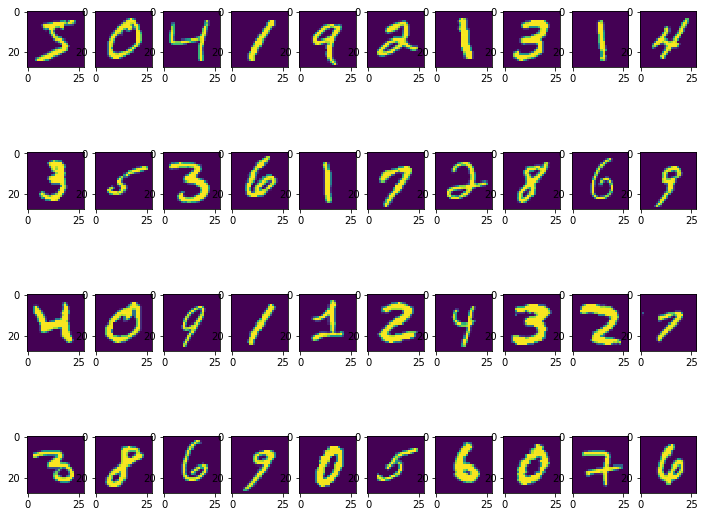

In [4]:
# Preview the training data
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(trainImages[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [6]:
# Hyper Parameters
batch_size = 128
num_classes = testLabels.shape[1]
epochs = 12

In [7]:
# create model
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
# Get Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [8]:
# Train 
h = model.fit(trainImages, trainLabels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(testImages, testLabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.2571 - acc: 0.9200 - val_loss: 0.0521 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0885 - acc: 0.9740 - val_loss: 0.0367 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.0641 - acc: 0.9805 - val_loss: 0.0340 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0545 - acc: 0.9838 - val_loss: 0.0371 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0489 - acc: 0.9857 - val_loss: 0.0276 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0416 - acc: 0.9871 - val_loss: 0.0277 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0368 - acc: 0.9883 - val_loss: 0.0293 - val_ac

In [9]:
# Evaluate Accuracy
score = model.evaluate(testImages, testLabels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 51us/step
Test loss: 0.0295845363217672
Test accuracy: 0.9913


In [13]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





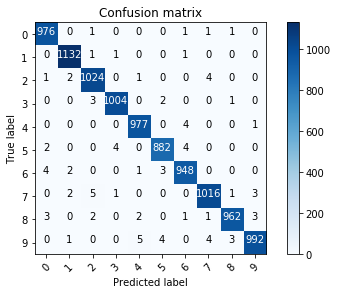

In [14]:
# Predict the values from the validation dataset
Y_pred = model.predict(testImages)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testLabels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


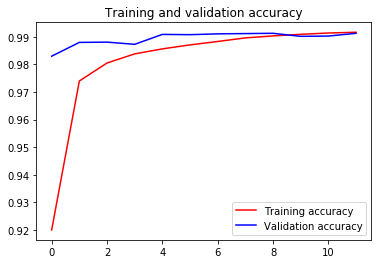

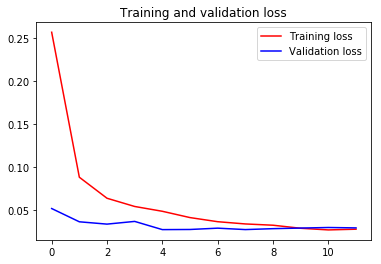

In [15]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

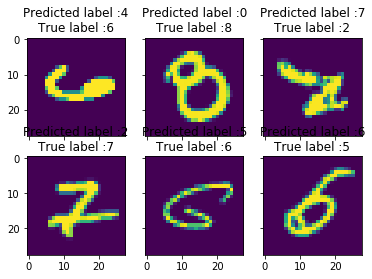

In [16]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = testImages[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)